In [1]:
#Load the Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import math
import statistics
import scipy

In [2]:
#Check the Working Directory
import os
os.getcwd()

'C:\\Windows\\System32\\opencv\\Scripts\\LetsupgradeAI\\ML'

In [3]:
df=pd.read_csv('general_data.csv')

In [4]:
#CHeck the First 5 rows of the Dataset
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
#Check the Last 5 rows of the Dataset
df.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [6]:
#Check the Dimension of the Dataset
df.shape

(4410, 24)

In [7]:
#Check the Summary of the Dataset
df.describe(include="all")

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410.000000,4410,...,4391.000000,4410,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
unique,NaN,2,3,3,NaN,NaN,6,NaN,NaN,2,...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,Male,...,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3699,3129,2883,NaN,NaN,1818,NaN,NaN,2646,...,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,2205.500000,NaN,...,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,1273.201673,NaN,...,2.498887,NaN,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,1.000000,NaN,...,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,1103.250000,NaN,...,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,2205.500000,NaN,...,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,3307.750000,NaN,...,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000


In [8]:
#CHeck the Datatypes 
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [9]:
#Check the Columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
#Check for null values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [11]:
#From the above cell we can see there were 19 na values for "NUmCompaniesWorked" and 9 na values for "TotalWorkingYears"
#Lets use ffill to fill the na values
df.fillna(method='ffill',inplace=True)

In [12]:
#FInd the unique values across the columns

df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [13]:
#Find the Percentage of Attrition who stayed(No) and who left(Yes)

df['Attrition'].value_counts()/len(df)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [14]:
#Since we have to Predict the Attrition of the Employees convert the Attrition Categorical column to NUmeric using pd.get_dummies()
dfnew=pd.concat([df,pd.get_dummies(df['Attrition'],prefix='Attrition')],axis=1)
dfnew


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,17,8,1,10.0,5,3,0,2,1,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,15,8,0,10.0,2,3,0,2,1,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,20,8,0,5.0,4,4,1,2,1,0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,14,8,1,10.0,2,9,7,8,1,0


In [15]:
#now Drop the original Attrition Column
#dfnew.drop(['Attrition'],axis=1,inplace=True)


In [16]:
dfnew

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,11,8,0,1.0,6,1,0,0,1,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,23,8,1,6.0,3,5,1,4,0,1
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,15,8,3,5.0,2,5,0,3,1,0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,11,8,3,13.0,5,8,7,5,1,0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,12,8,2,9.0,2,6,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,17,8,1,10.0,5,3,0,2,1,0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,15,8,0,10.0,2,3,0,2,1,0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,20,8,0,5.0,4,4,1,2,1,0
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,14,8,1,10.0,2,9,7,8,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FDFAF047C8>,
      dtype=object)

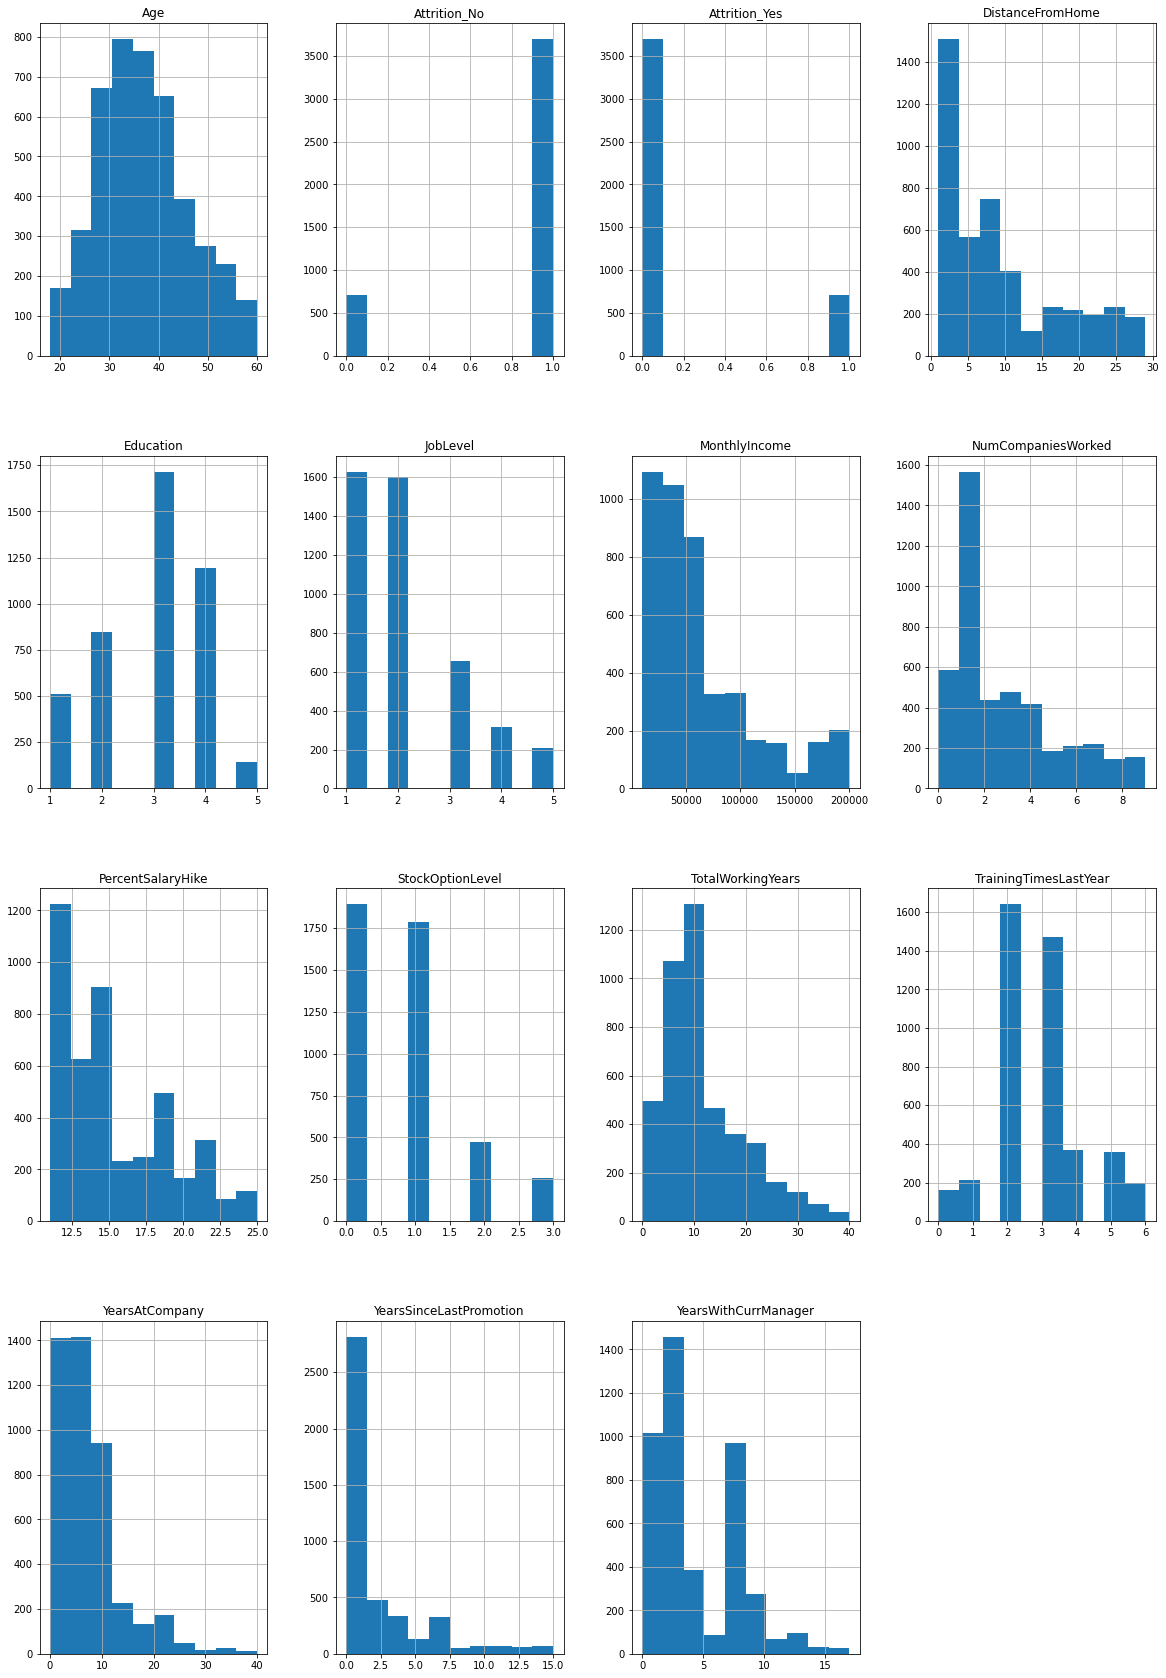

In [59]:
#PLot the Histogram 
dfnew.hist(figsize=(20,30))

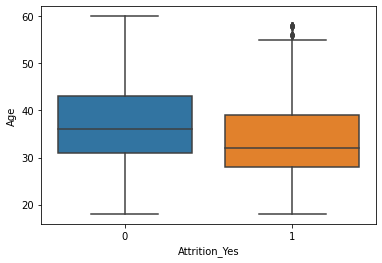

In [18]:
#PLot the Box pLot to check the distribution of data between Attrition_Yes and other columns
import seaborn as sns
sns.boxplot(x='Attrition_Yes',y='Age',data=dfnew)


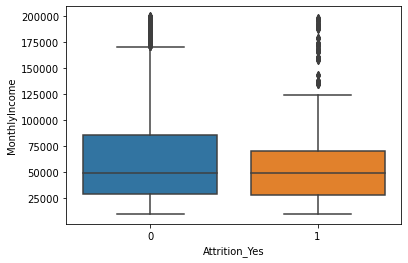

In [19]:
#Attrition_Yes and MOnthlyIncome
sns.boxplot(x='Attrition_Yes',y='MonthlyIncome',data=dfnew)

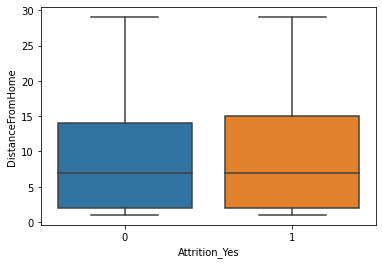

In [20]:
#Attrition_Yes and DistanceFromHome
sns.boxplot(x='Attrition_Yes',y='DistanceFromHome',data=dfnew)

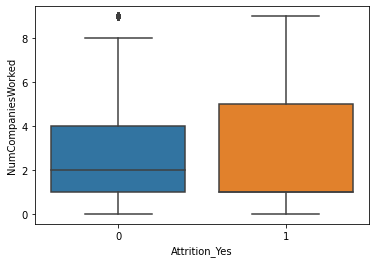

In [21]:
#Attrition _Yes and NumCompaniesWorked
sns.boxplot(x='Attrition_Yes',y='NumCompaniesWorked',data=dfnew)

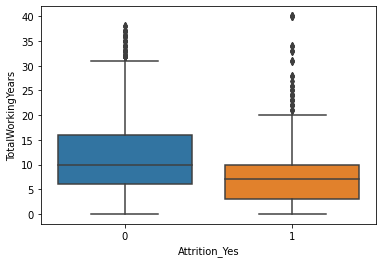

In [22]:
#Attrition_Yes and TotalWorkingYears
sns.boxplot(x='Attrition_Yes',y='TotalWorkingYears',data=dfnew)

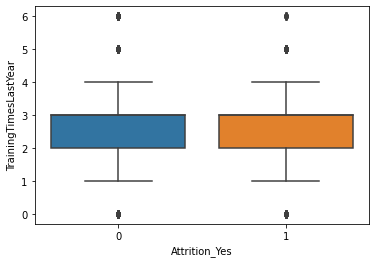

In [23]:
#ATtrition_Yes and TrainingTimesLastYear
sns.boxplot(x='Attrition_Yes',y='TrainingTimesLastYear',data=dfnew)

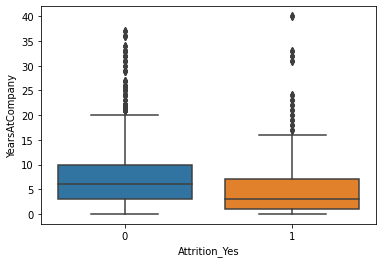

In [24]:
#Attrition_Yes and YearsAtCompany
sns.boxplot(x='Attrition_Yes',y='YearsAtCompany',data=dfnew)

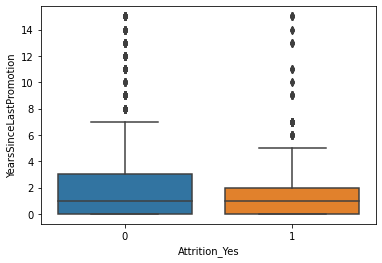

In [25]:
#Attrition_Yes and YearsSinceLastPromotion
sns.boxplot(x='Attrition_Yes',y='YearsSinceLastPromotion',data=dfnew)

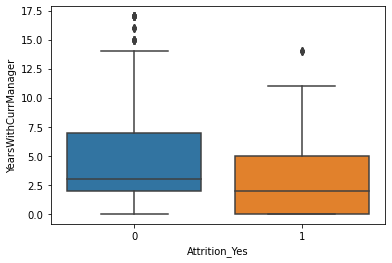

In [26]:
#Attrition_Yes AND YearsWithCurrManager
sns.boxplot(x='Attrition_Yes',y='YearsWithCurrManager',data=dfnew)

In [28]:
#Check the COrrelation
dfnew.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.296805,-0.033137,NaN,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013006,0.038125,NaN,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016912,-0.040531,NaN,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.002902,-0.004456,NaN,-0.014254,-0.000577,-0.010191,0.004086,0.000256,0.008579,0.004729,-0.004729
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.011028,0.010973,NaN,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020922,0.004325,NaN,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,NaN,-0.002902,-0.011028,-0.020922,1.000000,0.030717,NaN,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030717,1.000000,NaN,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#The crosstab() function is used to compute a simple cross tabulation of two (or more) factors. 
pd.crosstab(dfnew['Attrition_Yes'],dfnew['Gender'])

Gender,Female,Male
Attrition_Yes,,
0,1494,2205
1,270,441


In [30]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['MonthlyIncome'])

MonthlyIncome,10090,10510,10520,10810,10910,11020,11180,11290,12000,12230,...,197170,197400,198330,198450,198470,198590,199260,199430,199730,199990
Attrition_Yes,,,,,,,,,,,,,,,,,,,,,
0,0,3,3,3,3,3,3,0,3,3,...,3,3,3,3,3,0,3,3,3,3
1,3,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,3,0,0,0,0


In [31]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['DistanceFromHome'])

DistanceFromHome,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Attrition_Yes,,,,,,,,,,,,,,,,,,,,,
0,528,519,222,159,165,156,204,207,219,198,...,66,48,48,69,75,69,72,27,57,69
1,96,114,30,33,30,21,48,33,36,60,...,9,6,9,12,9,6,3,9,12,12


In [32]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['NumCompaniesWorked'])

NumCompaniesWorked,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Attrition_Yes,,,,,,,,,,
0,518,1274,392,426,365,141,161,171,130,121
1,70,294,48,49,51,46,48,51,18,36


In [33]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['TotalWorkingYears'])

TotalWorkingYears,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,30.0,31.0,32.0,33.0,34.0,35.0,36.0,37.0,38.0,40.0
Attrition_Yes,,,,,,,,,,,,,,,,,,,,,
0,18,123,67,99,154,216,309,189,260,257,...,21,24,27,18,12,9,18,12,3,0
1,15,119,28,27,36,48,66,54,47,30,...,0,3,0,3,3,0,0,0,0,6


In [34]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['TrainingTimesLastYear'])

TrainingTimesLastYear,0,1,2,3,4,5,6
Attrition_Yes,,,,,,,
0,132,183,1359,1215,321,306,183
1,30,30,282,258,48,51,12


In [35]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['YearsAtCompany'])

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Attrition_Yes,,,,,,,,,,,,,,,,,,,,,
0,84,336,300,324,273,525,201,237,213,222,...,6,6,3,6,6,12,3,6,3,0
1,48,177,81,60,57,63,27,33,27,24,...,0,0,0,3,3,3,0,0,0,3


In [36]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['Age'])

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
Attrition_Yes,,,,,,,,,,,,,,,,,,,,,
0,12,9,15,21,33,30,57,60,81,135,...,51,45,51,54,57,33,12,27,30,15
1,12,18,18,18,15,12,21,18,36,9,...,6,9,6,0,9,9,0,15,0,0


In [37]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['YearsSinceLastPromotion'])

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Attrition_Yes,,,,,,,,,,,,,,,,
0,1413,924,396,129,168,129,78,180,54,39,15,66,30,24,24,30
1,330,147,81,27,15,6,18,48,0,12,3,6,0,6,3,9


In [38]:
pd.crosstab(dfnew['Attrition_Yes'],dfnew['YearsWithCurrManager'])

YearsWithCurrManager,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Attrition_Yes,,,,,,,,,,,,,,,,,,
0,534,195,882,369,261,81,75,555,291,174,72,63,54,42,9,15,6,21
1,255,33,150,57,33,12,12,93,30,18,9,3,0,0,6,0,0,0


In [48]:
#Remove unwanted columns

#Remove the column EmployeeID
dfnew = dfnew.drop('EmployeeID', axis = 1)  
#Remove the column StandardHours
dfnew = dfnew.drop('StandardHours', axis = 1) 
#Remove the column EmployeeCount
dfnew = dfnew.drop('EmployeeCount', axis = 1) 
#Remove the column EmployeeCount
dfnew = dfnew.drop('Over18', axis = 1)

In [49]:
#Check the COrrelation
corr=dfnew.corr()
corr

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_No,Attrition_Yes
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.296805,-0.033137,-0.031753,0.678857,-0.027308,0.311309,0.216513,0.202089,0.159205,-0.159205
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.013006,0.038125,0.011169,0.007762,-0.009001,0.031684,0.002290,0.021584,0.009730,-0.009730
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016912,-0.040531,0.001261,-0.009485,0.010472,0.006080,0.022490,0.005358,0.015111,-0.015111
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.011028,0.010973,0.000993,-0.037831,-0.032500,-0.064219,-0.060811,-0.055251,0.010290,-0.010290
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.020922,0.004325,0.026930,-0.034005,0.050112,0.000995,0.065219,0.024304,0.031176,-0.031176
NumCompaniesWorked,0.296805,-0.013006,-0.016912,-0.011028,-0.020922,1.000000,0.030717,0.017484,0.235617,-0.032565,-0.117199,-0.035774,-0.108004,-0.041736,0.041736
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.030717,1.000000,0.012548,-0.018432,-0.037392,-0.029707,-0.029542,-0.040864,-0.032533,0.032533
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017484,0.012548,1.000000,0.001822,-0.069902,0.007886,0.019063,0.017757,0.006839,-0.006839
TotalWorkingYears,0.678857,0.007762,-0.009485,-0.037831,-0.034005,0.235617,-0.018432,0.001822,1.000000,-0.039285,0.626275,0.403646,0.458239,0.169622,-0.169622
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032565,-0.037392,-0.069902,-0.039285,1.000000,-0.007894,0.016121,-0.013270,0.049431,-0.049431


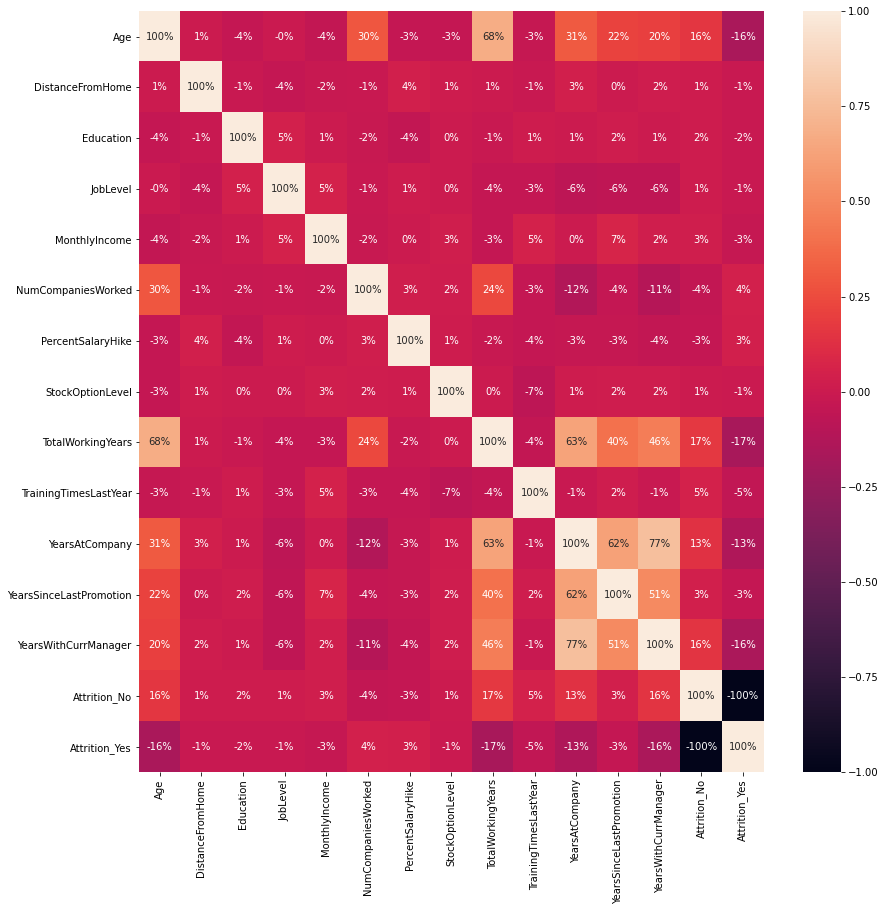

In [50]:
#Seaborn heatmap is to visualize the correlation matrix of data for feature selection
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(dfnew.corr(), annot=True, fmt='.0%')

From the above we can draw below conclusions
1.Total working Years and Age
2.Totalworking Years and Yearsatcompany
3.Yearsatcompany and YearswithcurrentManager
4.Yearssincelastpromotion and Yearsatcompany



In [51]:
dfnew[[ 'Attrition_Yes', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].mean()

Attrition_Yes                  0.161224
DistanceFromHome               9.192517
Education                      2.912925
JobLevel                       2.063946
MonthlyIncome              65029.312925
NumCompaniesWorked             2.693197
PercentSalaryHike             15.209524
StockOptionLevel               0.793878
TotalWorkingYears             11.285261
TrainingTimesLastYear          2.799320
YearsAtCompany                 7.008163
YearsSinceLastPromotion        2.187755
YearsWithCurrManager           4.123129
Age                           36.923810
dtype: float64

In [52]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].median()

DistanceFromHome               7.0
Education                      3.0
JobLevel                       2.0
MonthlyIncome              49190.0
NumCompaniesWorked             2.0
PercentSalaryHike             14.0
StockOptionLevel               1.0
TotalWorkingYears             10.0
TrainingTimesLastYear          3.0
YearsAtCompany                 5.0
YearsSinceLastPromotion        1.0
YearsWithCurrManager           3.0
Age                           36.0
dtype: float64

In [53]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].mode()

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Age
0,No,Travel_Rarely,Research & Development,2,3,Life Sciences,1,Sales Executive,Married,23420,1.0,11,0,10.0,2,5,0,2,35


In [54]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].std()

DistanceFromHome               8.105026
Education                      1.023933
JobLevel                       1.106689
MonthlyIncome              47068.888559
NumCompaniesWorked             2.499167
PercentSalaryHike              3.659108
StockOptionLevel               0.851883
TotalWorkingYears              7.787073
TrainingTimesLastYear          1.288978
YearsAtCompany                 6.125135
YearsSinceLastPromotion        3.221699
YearsWithCurrManager           3.567327
Age                            9.133301
dtype: float64

In [55]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].var()

DistanceFromHome           6.569144e+01
Education                  1.048438e+00
JobLevel                   1.224760e+00
MonthlyIncome              2.215480e+09
NumCompaniesWorked         6.245837e+00
PercentSalaryHike          1.338907e+01
StockOptionLevel           7.257053e-01
TotalWorkingYears          6.063850e+01
TrainingTimesLastYear      1.661465e+00
YearsAtCompany             3.751728e+01
YearsSinceLastPromotion    1.037935e+01
YearsWithCurrManager       1.272582e+01
Age                        8.341719e+01
dtype: float64

In [57]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].kurt()

DistanceFromHome          -0.227045
Education                 -0.560569
JobLevel                   0.395525
MonthlyIncome              1.000232
NumCompaniesWorked         0.011277
PercentSalaryHike         -0.302638
StockOptionLevel           0.361086
TotalWorkingYears          0.901566
TrainingTimesLastYear      0.491149
YearsAtCompany             3.923864
YearsSinceLastPromotion    3.601761
YearsWithCurrManager       0.167949
Age                       -0.405951
dtype: float64

In [58]:
dfnew[[ 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField','JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Age']].skew()

DistanceFromHome           0.957466
Education                 -0.289484
JobLevel                   1.024703
MonthlyIncome              1.368884
NumCompaniesWorked         1.029043
PercentSalaryHike          0.820569
StockOptionLevel           0.968321
TotalWorkingYears          1.113861
TrainingTimesLastYear      0.552748
YearsAtCompany             1.763328
YearsSinceLastPromotion    1.982939
YearsWithCurrManager       0.832884
Age                        0.413005
dtype: float64